In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
from matplotlib import pyplot as plt

# Load data
data = pd.read_csv(
    "../../data/article_company_breach/joined_articles_company_breaches_no_duplicates.csv",
    encoding="ISO-8859-1",
    low_memory=False,
)

In [29]:
# Count the number of articles and TOTAL records lost per breach
# breach_summary = data.groupby('organisation').agg({
#     'records lost': 'sum',
#     'Publication': 'count'
# }).rename(columns={'Publication': 'article_count'})

# # Calculate the proportion of records breached to articles published
# breach_summary['records_per_article'] = breach_summary['records lost'] / breach_summary['article_count']

breach_summary = data.groupby('Publication').agg({
    'records lost': 'sum',  # Total records lost
    'Headline': 'count',  # Count unique headlines

    'sector': 'first',  # Sector of the breach
    'data sensitivity': 'first',  # Sensitivity level
}).rename(columns={'Headline': 'article_count'})  # Rename to make it intuitive

breach_summary = breach_summary.reset_index()


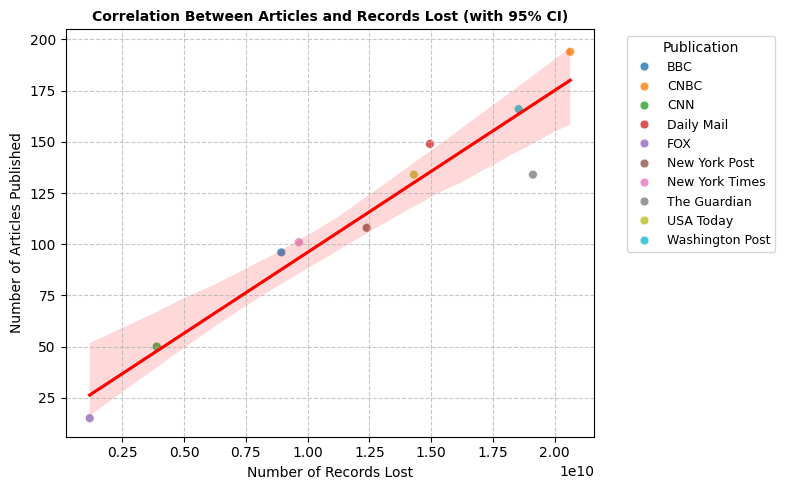

In [56]:
# # Plot correlation between TOTAL articles published vs. TOTAL records lost
# plt.figure(figsize=(8, 5))
# ax = sns.regplot(
#     y='article_count',
#     x='records lost',
#     data=breach_summary,
#     scatter_kws={'alpha': 1, 's': 20},
#     line_kws={'color': 'red'},
#     ci=95,
#     color='black'
# )
# plt.title('Correlation Between Articles and Records Lost (with 95% CI)', fontsize=10, fontweight='bold')
# plt.ylabel('Number of Articles Published', fontsize=10)
# plt.xlabel('Number of Records Lost', fontsize=10)
# plt.grid(axis='both', linestyle='--', alpha=0.7)

# plt.legend(title='Publication', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=9)

# # Annotate outliers
# outliers = breach_summary[breach_summary['records lost'] > breach_summary['records lost'].quantile(0.95)]
# for i, point in outliers.iterrows():
#     ax.annotate(
#         i,
#         (point['article_count'], point['records lost']),
#         textcoords="offset points",
#         xytext=(5, 5),
#         ha='center',
#         fontsize=8,
#         color='blue'
#     )

# plt.tight_layout()
# plt.show()

# plt.close()


# Plot correlation between TOTAL articles published vs. TOTAL records lost
plt.figure(figsize=(8, 5))

# Use scatterplot for color-encoding groupby column
scatter = sns.scatterplot(
    data=breach_summary,
    
    y='article_count',
    x='records lost',
    
    hue='Publication',  # color encoding

    palette='tab10',
    alpha=0.8,
    s=40
)

# Add the regression line using regplot (no scatter points)
reg = sns.regplot(
    y='article_count',
    x='records lost',
    data=breach_summary,
    scatter=False,  # Don't plot scatter points since they're already plotted
    line_kws={'color': 'red'},
    ci=95
)

# Customize the plot
plt.title('Correlation Between Articles and Records Lost (with 95% CI)', fontsize=10, fontweight='bold')
plt.ylabel('Number of Articles Published', fontsize=10)
plt.xlabel('Number of Records Lost', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Add custom legend for 'Publication'
handles, labels = scatter.get_legend_handles_labels()  # Get legend handles and labels
plt.legend(handles, labels, title='Publication', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=9)

# Annotate outliers
outliers = breach_summary[breach_summary['records lost'] > breach_summary['records lost'].quantile(0.95)]
for i, point in outliers.iterrows():
    reg.annotate(
        i,
        (point['article_count'], point['records lost']),
        textcoords="offset points",
        xytext=(5, 5),
        ha='center',
        fontsize=8,
        color='blue'
    )

plt.tight_layout()
plt.show()

plt.close()

